In [43]:
import pandas as pd
datos=pd.read_csv('titanic.csv')

In [44]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

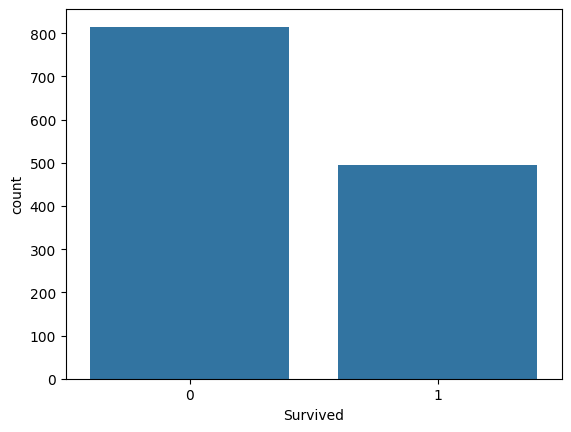

In [46]:
import seaborn as sb 
sb.countplot(x='Survived',data=datos)

<Axes: xlabel='Survived', ylabel='count'>

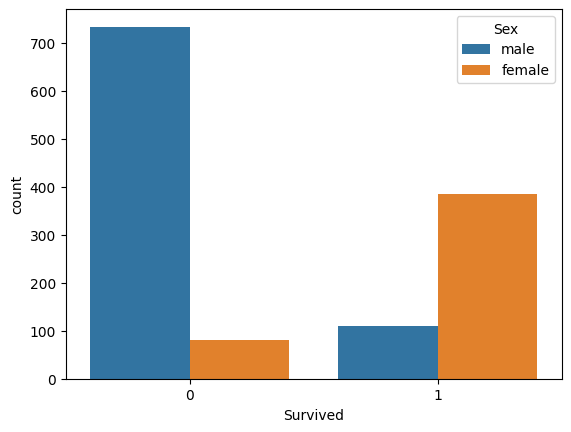

In [47]:
import seaborn as sb 
sb.countplot(x='Survived',data=datos,hue="Sex")

Ver datos vacios

In [48]:
datos.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Gráfico de distribución

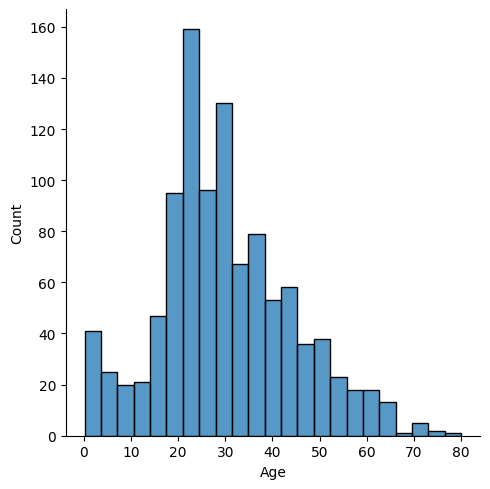

In [49]:
sb.displot(x='Age',data=datos)

In [50]:
datos['Age'].mean()

29.881137667304014

llenar datos vacios

In [51]:
datos['Age'].fillna(datos['Age'].mean(),inplace=True)

In [52]:
datos.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Quitar cabina y datos vacios

In [53]:
datos.drop('Cabin',axis=1,inplace=True) 

In [54]:
datos.dropna(inplace=True)

Quitar datos no relevantes

In [55]:
datos.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [56]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [57]:
dummies_sex=pd.get_dummies(datos["Sex"],drop_first=True, dtype=int)

In [58]:
datos=datos.join(dummies_sex)
datos.drop(["Sex"],axis=1,inplace=True)



<Axes: xlabel='Survived', ylabel='count'>

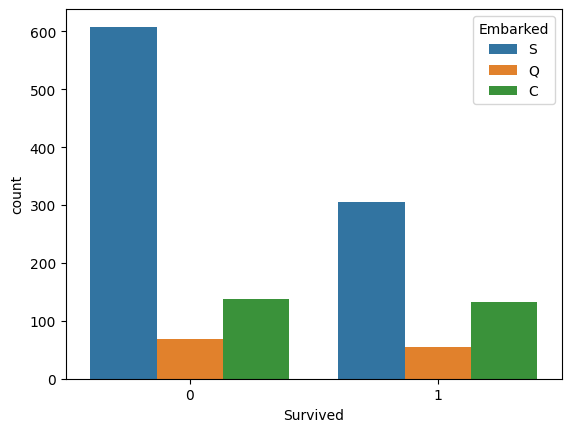

In [59]:
sb.countplot(x='Survived',data=datos,hue="Embarked")

In [60]:
dummies_embarked=pd.get_dummies(datos["Embarked"],drop_first=True, dtype=int)

In [61]:
datos=datos.join(dummies_embarked)
datos=datos.drop(["Embarked"],axis=1)

<Axes: >

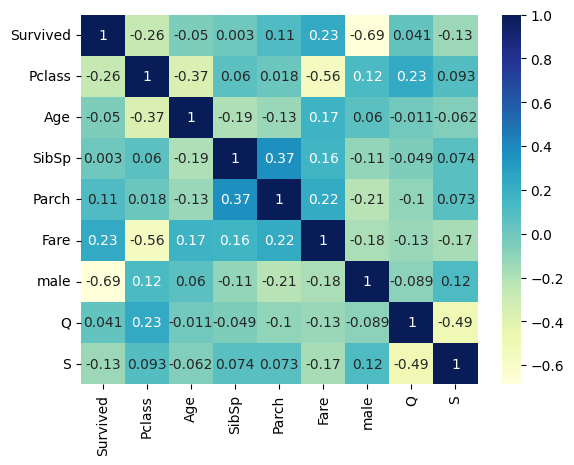

In [62]:

sb.heatmap(datos.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

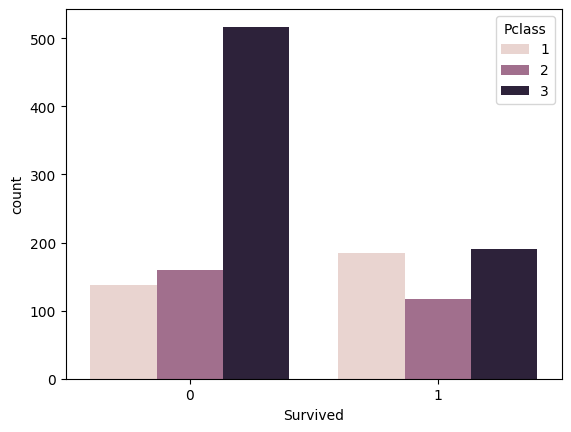

In [63]:
sb.countplot(x='Survived',data=datos,hue="Pclass")

In [64]:
x=datos.drop("Survived",axis=1)
y=datos["Survived"]

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Usamos DecisionThreeClassifier pues el ejercicio de Titanic es un ejercicio de Clasificación, pero si podemos usar otros métodos

max_depth entre más decisiones puede mejorar la predicción pero tambien podemos llegar al problema de sobreajuste

In [70]:
from sklearn.tree import DecisionTreeClassifier
modelo=DecisionTreeClassifier(max_depth=10)   
modelo.fit(x_train,y_train)
predicciones=modelo.predict(x_test)



In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicciones)

0.8816793893129771

In [85]:
from sklearn.tree import DecisionTreeClassifier
resultados=[]
for i in range(1,15):
        
    modelo=DecisionTreeClassifier(max_depth=i)   
    modelo.fit(x_train,y_train)
    predicciones=modelo.predict(x_test)
    exactitud=accuracy_score(y_test,predicciones)
    print(f"Para i={i},la exactitud es: {(exactitud*100):.2f}%")
    resultados.append(exactitud)

max_accuracy = max(resultados)
max_index = resultados.index(max_accuracy) + 1
print(f"La mejor exactitud es {max_accuracy*100:.2f}% con i={max_index}")


Para i=1,la exactitud es: 88.17%
Para i=2,la exactitud es: 87.79%
Para i=3,la exactitud es: 90.84%
Para i=4,la exactitud es: 90.84%
Para i=5,la exactitud es: 90.08%
Para i=6,la exactitud es: 89.31%
Para i=7,la exactitud es: 88.93%
Para i=8,la exactitud es: 89.31%
Para i=9,la exactitud es: 88.93%
Para i=10,la exactitud es: 87.79%
Para i=11,la exactitud es: 87.02%
Para i=12,la exactitud es: 82.82%
Para i=13,la exactitud es: 83.97%
Para i=14,la exactitud es: 84.73%
La mejor exactitud es 90.84% con i=3


<Axes: >

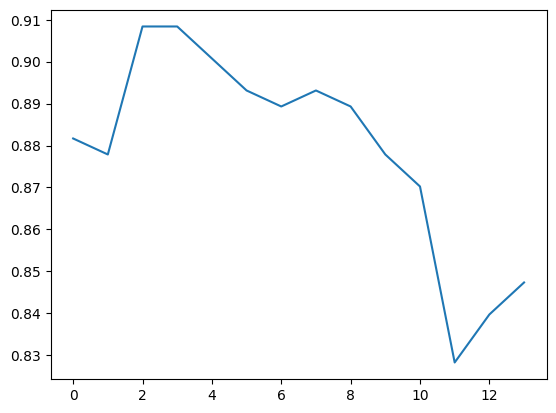

In [86]:
sb.lineplot(data=resultados)

In [87]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(x_train, y_train)
predicciones = modelo.predict(x_test)
exactitud = accuracy_score(y_test, predicciones)


In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predicciones))
pd.DataFrame(confusion_matrix(y_test, predicciones), columns=["Predicted No", "Predicted Yes"], index=["Actual No", "Actual Yes"])


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       166
           1       0.90      0.84      0.87        96

    accuracy                           0.91       262
   macro avg       0.91      0.89      0.90       262
weighted avg       0.91      0.91      0.91       262



,Predicted No,Predicted Yes
Actual No,157,9
Actual Yes,15,81


[Text(0.5, 0.875, 'male <= 0.5\n0.471\n1044\n[648, 396]\nMurió'),
 Text(0.25, 0.625, 'Pclass <= 2.5\n0.294\n369\n[66, 303]\nVivió'),
 Text(0.125, 0.375, 'Age <= 2.5\n0.089\n192\n[9, 183]\nVivió'),
 Text(0.0625, 0.125, '0.444\n3\n[1, 2]\nVivió'),
 Text(0.1875, 0.125, '0.081\n189\n[8, 181]\nVivió'),
 Text(0.375, 0.375, 'Fare <= 23.35\n0.437\n177\n[57, 120]\nVivió'),
 Text(0.3125, 0.125, '0.385\n150\n[39, 111]\nVivió'),
 Text(0.4375, 0.125, '0.444\n27\n[18, 9]\nMurió'),
 Text(0.75, 0.625, 'Age <= 5.0\n0.238\n675\n[582, 93]\nMurió'),
 Text(0.625, 0.375, 'SibSp <= 2.0\n0.493\n25\n[11, 14]\nVivió'),
 Text(0.5625, 0.125, '0.36\n17\n[4, 13]\nVivió'),
 Text(0.6875, 0.125, '0.219\n8\n[7, 1]\nMurió'),
 Text(0.875, 0.375, 'Pclass <= 1.5\n0.214\n650\n[571, 79]\nMurió'),
 Text(0.8125, 0.125, '0.385\n146\n[108, 38]\nMurió'),
 Text(0.9375, 0.125, '0.149\n504\n[463, 41]\nMurió')]

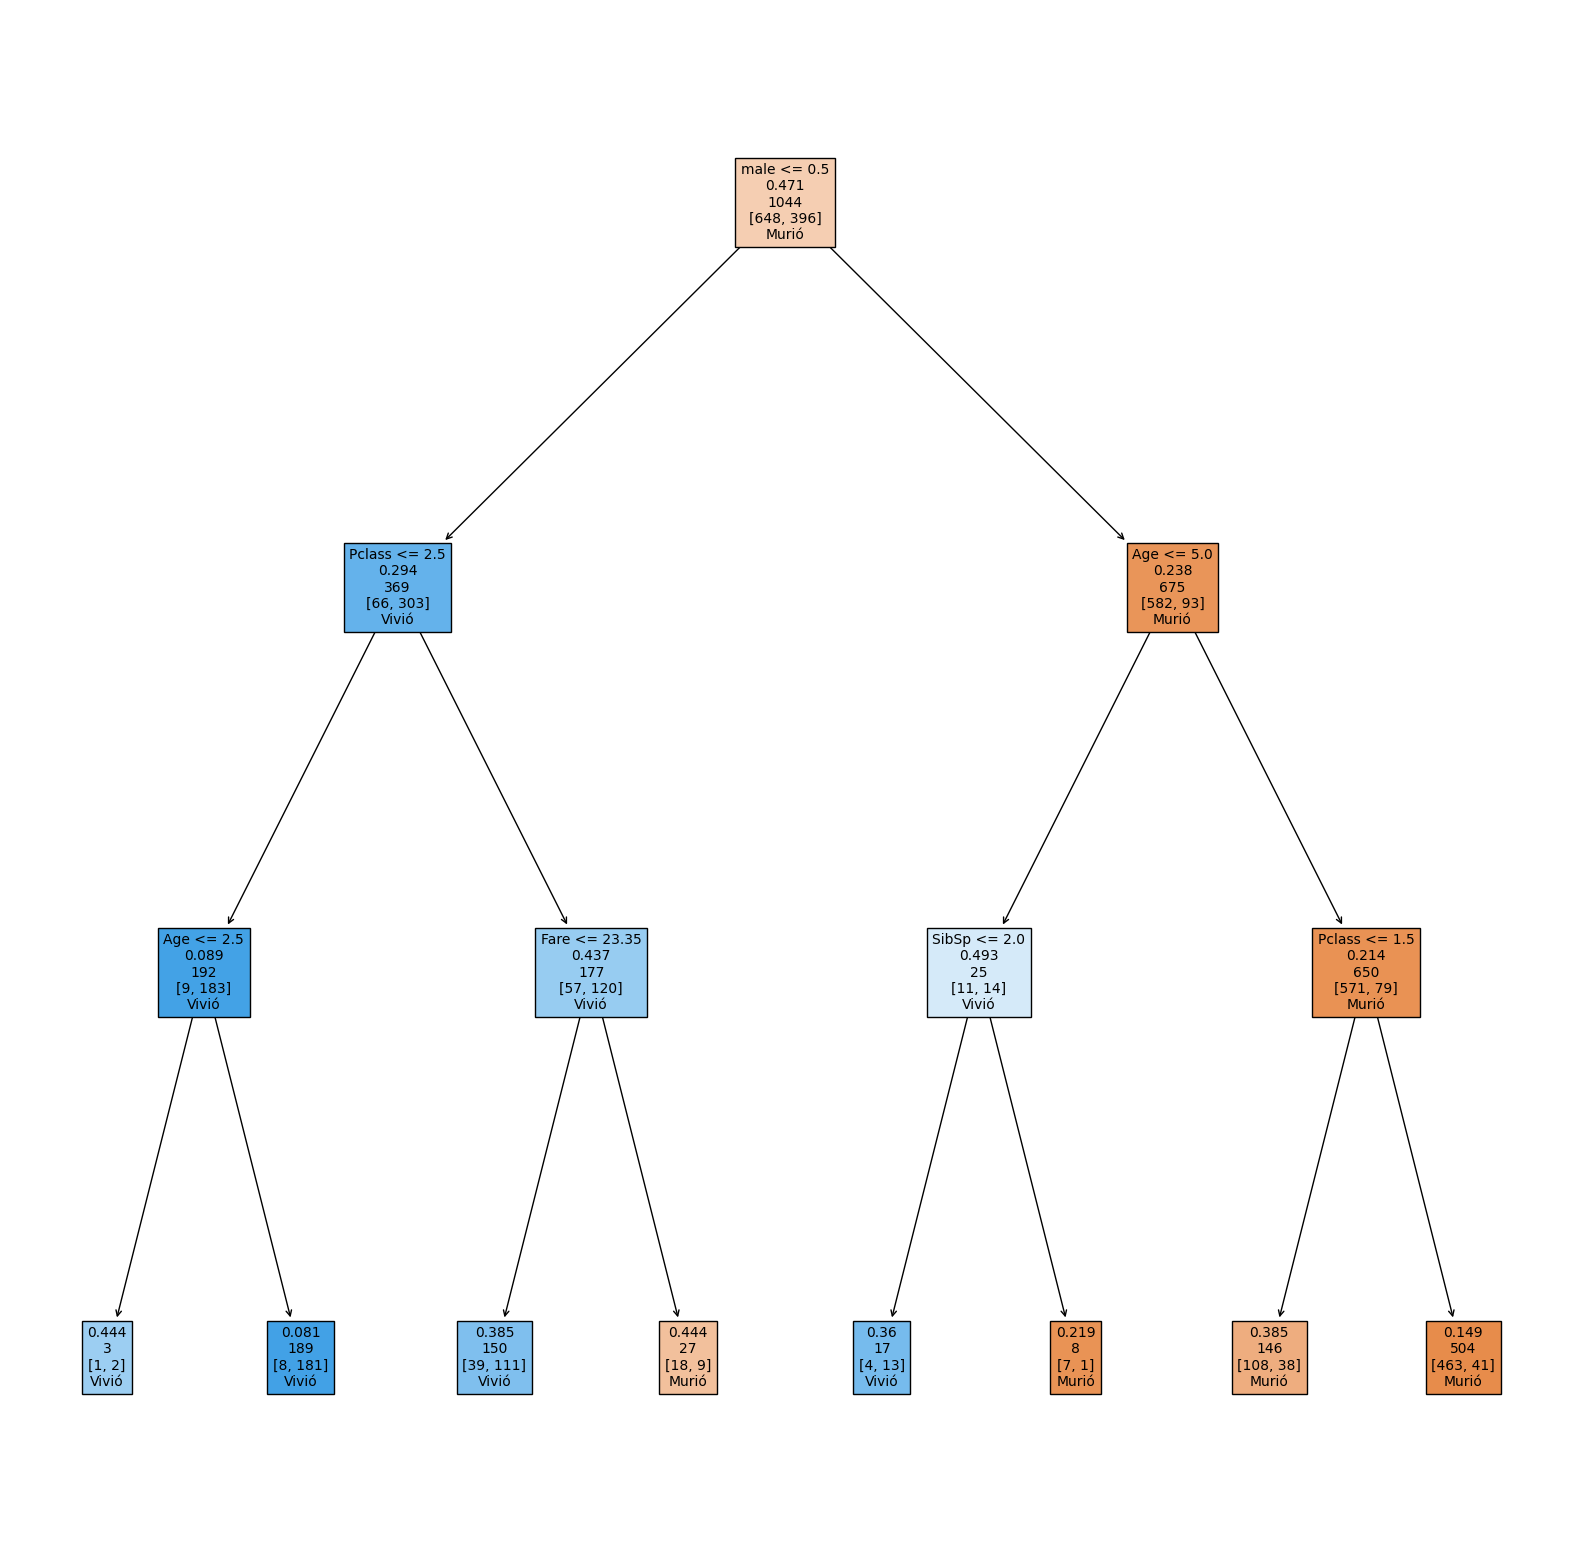

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plot_tree(modelo, feature_names=x_test.columns, class_names=["Murió", "Vivió"], filled=True,label="none" ,fontsize=10)